In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Suicide_Detection.csv')

In [3]:
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
df.drop('Unnamed: 0', axis = 1)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


<AxesSubplot:xlabel='class', ylabel='count'>

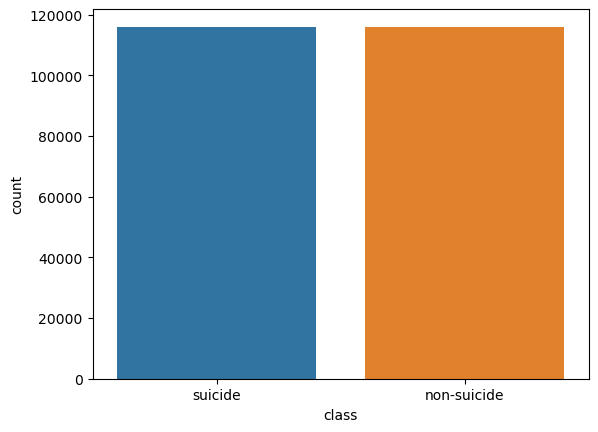

In [6]:
sns.countplot(data = df, x = 'class')

In [7]:
X = df['text']

In [8]:
X

0         Ex Wife Threatening SuicideRecently I left my ...
1         Am I weird I don't get affected by compliments...
2         Finally 2020 is almost over... So I can never ...
3                 i need helpjust help me im crying so hard
4         I’m so lostHello, my name is Adam (16) and I’v...
                                ...                        
232069    If you don't like rock then your not going to ...
232070    You how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    The usual stuff you find hereI'm not posting t...
232073    I still haven't beaten the first boss in Hollo...
Name: text, Length: 232074, dtype: object

In [9]:
y = df['class']

In [10]:
y

0             suicide
1         non-suicide
2         non-suicide
3             suicide
4             suicide
             ...     
232069    non-suicide
232070    non-suicide
232071    non-suicide
232072        suicide
232073    non-suicide
Name: class, Length: 232074, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [15]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [16]:
X_train_tfidf = tfidf.transform(X_train)

In [17]:
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf

<162451x132740 sparse matrix of type '<class 'numpy.float64'>'
	with 6794181 stored elements in Compressed Sparse Row format>

<b> Using MultinomialNB </b>

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

<b> Using LogisticRegression </b>

In [20]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

<b> Using SVC </b>

In [22]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [23]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [24]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

 non-suicide       0.97      0.81      0.88     34824
     suicide       0.83      0.97      0.90     34799

    accuracy                           0.89     69623
   macro avg       0.90      0.89      0.89     69623
weighted avg       0.90      0.89      0.89     69623



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


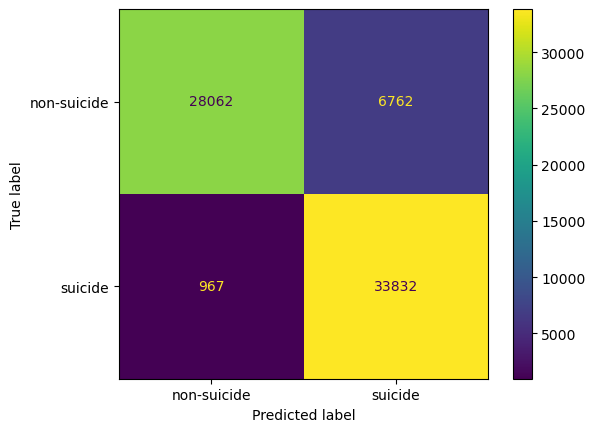

In [25]:
report(nb)

              precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     34824
     suicide       0.94      0.93      0.93     34799

    accuracy                           0.93     69623
   macro avg       0.93      0.93      0.93     69623
weighted avg       0.93      0.93      0.93     69623



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


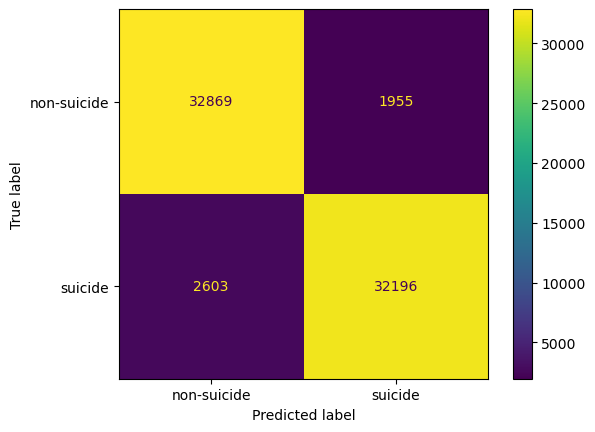

In [26]:
report(log_model)

              precision    recall  f1-score   support

 non-suicide       0.93      0.95      0.94     34824
     suicide       0.95      0.93      0.94     34799

    accuracy                           0.94     69623
   macro avg       0.94      0.94      0.94     69623
weighted avg       0.94      0.94      0.94     69623



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


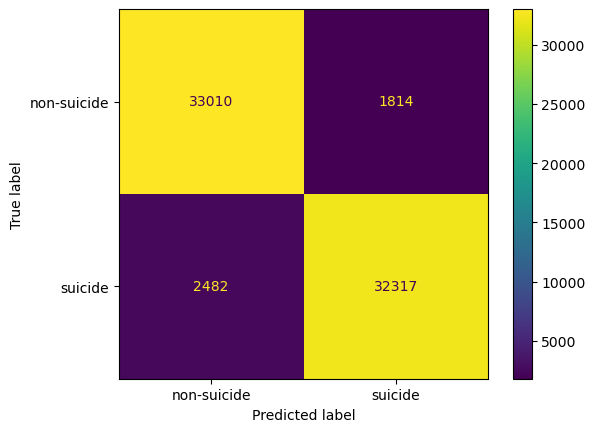

In [27]:
report(linear_svc)

<i> So, we choose Linear SVC because the accuracy is the highest! </i>

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('svc', LinearSVC())])

In [30]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [31]:
pipe.predict(['I want to die'])

array(['suicide'], dtype=object)

In [37]:
pipe.predict(['do not worry'])

array(['non-suicide'], dtype=object)